In [14]:
%matplotlib inline

import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time

## DTFD


A **Transformada de Fourier de Tempo Discreto** (DTFD) é uma transformada integral que é realizada sobre uma função, cuja variável independente é discreta, ou seja, uma análise de Fourier em uma sequência discreta. Usa-se para analizar/avaliar amostras de sinais contínuos onde a distância entre uma amostra e outra é o próprio tempo de amostragem. Matematicamente temos:

$$ 
X(e^{j\omega})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}
$$

Note que ao analizar $X(e^{j(\omega+ 2\pi)})$ tem-se:
$$
X(e^{j(\omega+ 2\pi)})=\sum_{n=-\infty}^{\infty} x(n)e^{-j(\omega+2\pi) n}
$$

$$
X(e^{j(\omega+ 2\pi)})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}e^{-j 2\pi n}
$$

Como $n \in \mathbb{Z}$, então $e^{-j 2\pi n} = 1, \forall n$. Pode-se concluir então que:

$$
X(e^{j(\omega+ 2\pi)})=X(e^{j\omega})=\sum_{n=-\infty}^{\infty} x(n)e^{-j\omega n}
$$

Ou seja, a DTFD de um sinal amostrado qualquer (sequência discreta) sempre é periódica. A seguir é feito um código que consegue calcular a DTFD de um sinal qualquer $x(n)$.

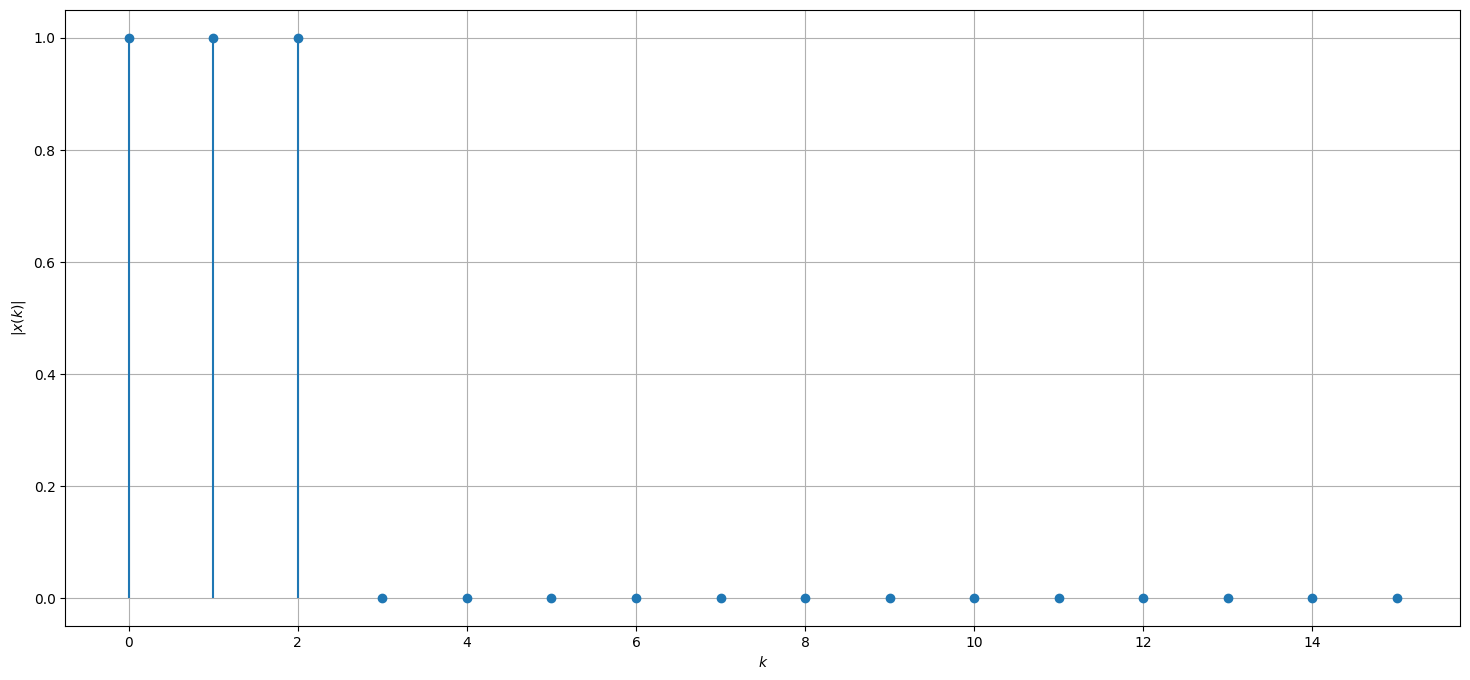

In [15]:
def porta(x_min,x_max,amp, x0,xf):
    x = np.arange(x0,xf+1,1)
    funcao = ((x<(x_max+1)) & (x>(x_min-1)))*amp
    return x, funcao

x, y =porta(0,2,1,0,15)

plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(x, y)
plt.xlabel("$k$")
plt.ylabel("$|x(k)|$")
plt.grid(True)
baseline.set_visible(False)

In [16]:
def dtfd(function):

    #omega entre -2pi e 2pi
    omega = np.linspace(0,2*np.pi, 50000)

    #somatorio da transformada de fourier de tempo discreto
    soma = np.zeros_like(omega, dtype=complex)

    #TENHO QUE CORRIGIR, POIS AQUI APENAS CONSIDERA SINAIS CAUSAIS 
    for i in range(len(function)):
        exp = np.exp(-1j*omega*i)
        soma = soma + function[i]*exp

    return omega, soma

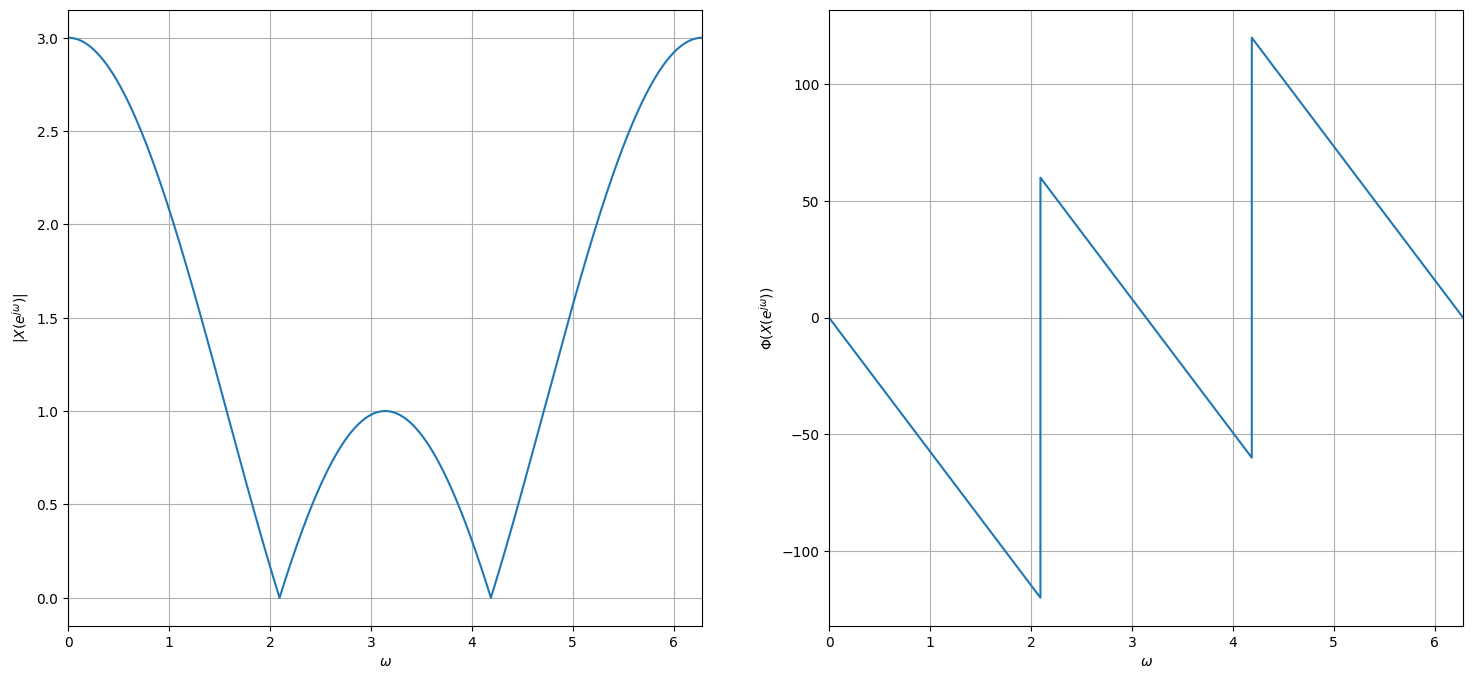

In [17]:
x, y =porta(0,2,1,0,15)

# x, y = cos_amostrado(40,240)

freq, soma = dtfd(y)

figure,axis = plt.subplots(1,2, figsize=(18,8))
axis[0].plot(freq, abs(soma))
axis[0].set_xlim(min(freq),max(freq))
axis[0].set_xlabel("$\omega$")
axis[0].set_ylabel("$|X(e^{j\omega})|$")
axis[0].grid(True)

axis[1].plot(freq, np.angle(soma)*180/np.pi)
axis[1].set_xlim(min(freq),max(freq))
axis[1].set_xlabel("$\omega$")
axis[1].set_ylabel("$\Phi(X(e^{j\omega}))$")
axis[1].grid(True)


## DFT

A **Transformada Discreta de Fourier** (DFT) é proveniente da DTFD. Note que o sinal $x(n)$ exemplificado no código acima já havia passado pelo processo de amostragem, porém seu espectro é contínuo. Computacionalmente, é necessário amostrar o espectro, visto que a análise espectral é realizada por meio de um processador digital. 

Portanto, tomando $N$ amostras no espectro igualmente espaçadas em $\frac{2\pi}{N}$ pode-se representar a DFT por:

$$
\hat{x}(k) = \sum_{n=0}^{N-1} x(n) e^{-j 2k\pi n/N }
$$

Onde $\hat{x}(k)$ é a DFT; $N$ é a quantidade de amostras do espectro. $N$ deve ser sempre maior que a quantidade de $x(n)$ e deve ser potência de 2.

Para facilitar a implementação computacional, a DFT pode ainda ser representada matricialmente. Segue abaixo:

$$
\begin{bmatrix}
\hat{x}(0) \\
\hat{x}(1) \\
\hat{x}(2) \\
\vdots \\
\hat{x}(N-1)
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega_N & \omega_N^2 & \cdots & \omega_N^{N-1} \\
1 & \omega_N^2 & \omega_N^4 & \cdots & \omega_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_N^{N-1} & \omega_N^{2(N-1)} & \cdots & \omega_N^{(N-1)^2}
\end{bmatrix}
\begin{bmatrix}
x(0) \\
x(1) \\
x(2) \\
\vdots \\
x(N-1)
\end{bmatrix}
$$

onde $\omega_{N} = e^{-2\pi j / N}$.

In [18]:
def DFT(y, N):

    k = np.arange(0, N, 1)
    #Zero padding em x(n)
    if(len(y)<N):
        zeros = N - len(y)
        y = np.append(y,np.zeros(zeros))
    
    #Exponencial da DFT
    Wn = np.exp(-2j*np.pi/N)

    #Matriz DFT inicialmente preenchida com zeros
    matriz_DFT = np.zeros([N,N],dtype=complex)

    #Construcao da matriz DFT
    for i in range(N):
        for j in range(N):
            matriz_DFT[i][j]=Wn**((i)*(j))

    #Matriz DFT multiplicada por a matriz x(n)
    DFT = matriz_DFT @ y
    return k,DFT

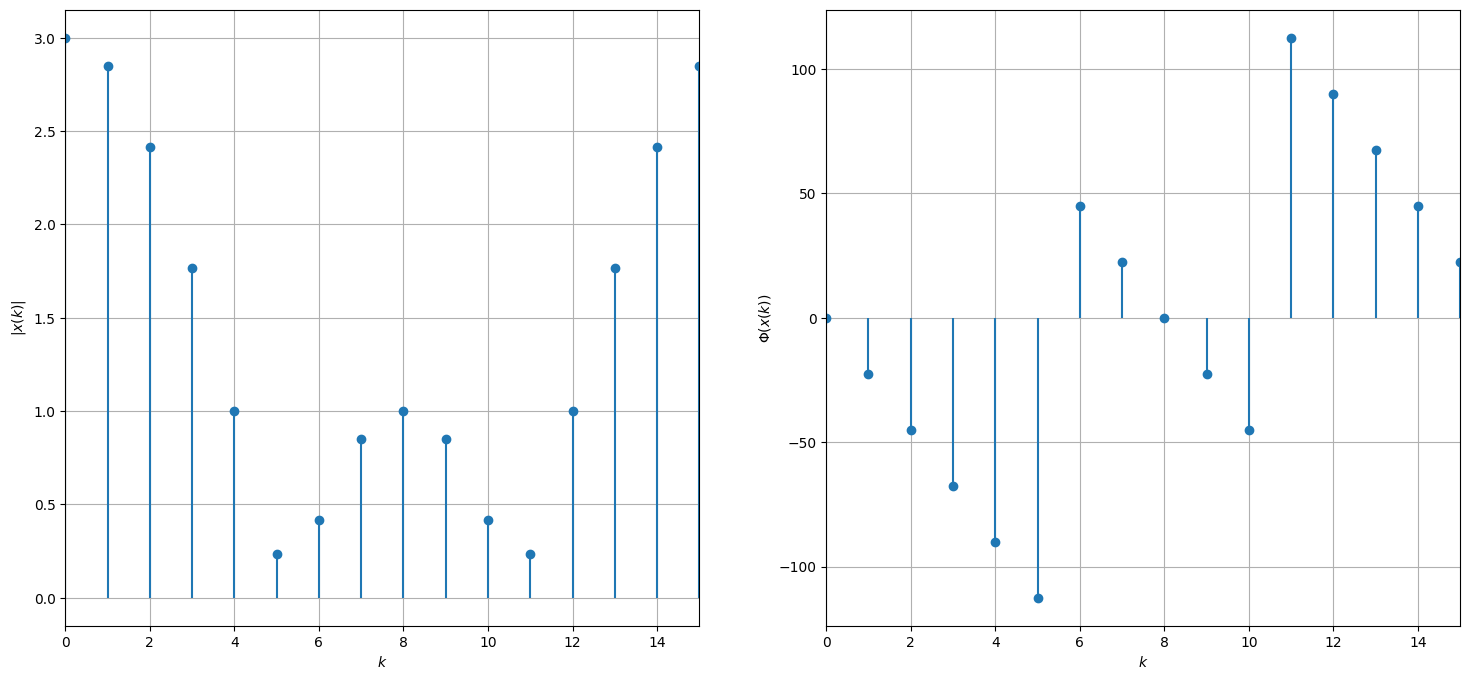

In [19]:
x, y =porta(0,2,1,0,15)

x, dft = DFT(y,2**4)

figure,axis = plt.subplots(1,2, figsize=(18,8))
(markerline, stemlines, baseline) = axis[0].stem(x, (abs(dft)))
axis[0].set_xlim(min(x),max(x))
axis[0].set_xlabel("$k$")
axis[0].set_ylabel("$|x(k)|$")
axis[0].grid(True)
baseline.set_visible(False)

(markerline, stemlines, baseline) = axis[1].stem(x, (np.angle(dft)*180/np.pi))
axis[1].set_xlim(min(x),max(x))
axis[1].set_xlabel("$k$")
axis[1].set_ylabel("$\Phi(x(k))$")
axis[1].grid(True)
baseline.set_visible(False)

## Tempo gasto para execução do algoritmo

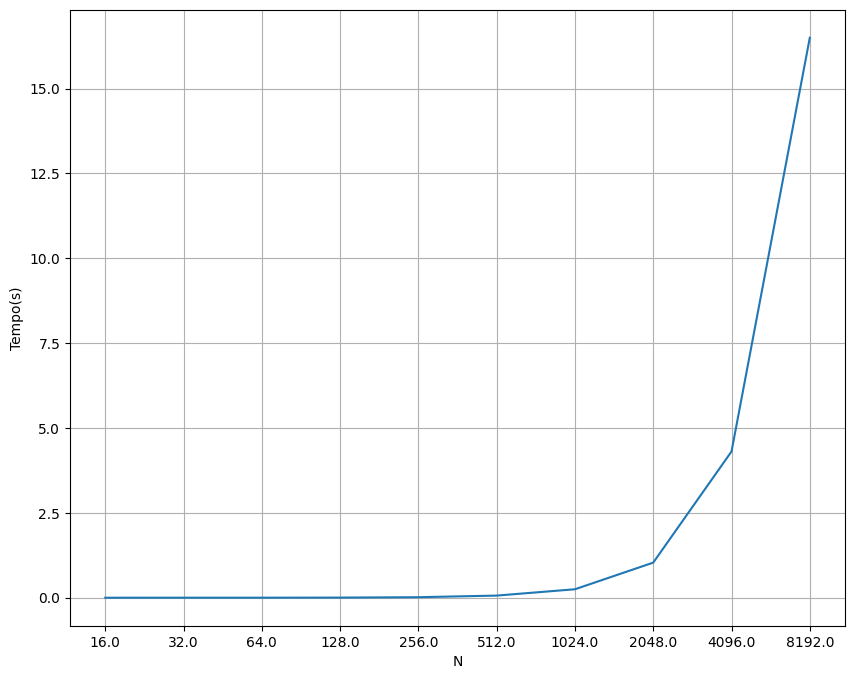

In [20]:
x, y =porta(0,2,1,0,15)

# aproximacao para cima de 2^aprox.
# Se o sinal tem tamanho 12, a potencia de dois mais proxima eh 16 = 2^5. Aprox = 5
aprox = mt.ceil(np.log2(len(x)))

# Devido limitacao em meu pc, so consigo calcular a DFT ate N = 2^13
potencia_max = 13

# para o sinal de tamanho 12, onde a potencia de 2 aproximada para cima eh 2^5, entao so consigo simular de N=5 ate N=13
qtd_testes = potencia_max - aprox


vetor_N = np.array([])
vetor_tempo = np.array([])

for i in range (qtd_testes+1):

    #tempo imediatamente antes de executar a DFT
    inicio = time.time()

    x_new,dft = DFT(y,2**(aprox+i))
    #tempo imediatamente depois de executar a DFT
    final = time.time()

    vetor_tempo = np.append(vetor_tempo, final-inicio)
    vetor_N=np.append(vetor_N,2**(i+aprox))

plt.figure(figsize=(10,8))
plt.plot(vetor_N,vetor_tempo)
plt.xscale('log', base=2)
plt.xticks(vetor_N, [str(val) for val in vetor_N])  
plt.xlabel("N")
plt.ylabel("Tempo(s)")
plt.grid(True)

# FFT

A **FFT** (Fast Fourier Transform) é um algoritmo eficiente para o cálculo da DFT. Com base na definição da DFT, pode-se notar que o poder computacional é da ordem $O(N^2)$, visto que, para o cálculo de $\hat{x}(k)$ são necessários N multiplicações complexas, para cada amostra da DFT (N ao todo). A FFT consegue reduzir a complexidade, sendo um algoritmo de ordem **$O(Nlog_2(N))$**. Será estudado o algoritmo de Cooley-Turkey, conhecido também pelo algoritmo de decimação no tempo.

Lembre que a DFT é dada por:

$$
\hat{x}(k) = \sum_{n=0}^{N-1} x(n) e^{-j 2k\pi n/N }
$$

Agora o somatório será separado em componentes pares e ímpares.


$$
\hat{x}(k) = \sum_{n=0}^{N/2 -1} x(2n) e^{-j 2k\pi (2n)/N } + \sum_{n=0}^{N/2-1} x(2n+1) e^{-j 2k\pi (2n+1)/N } 
$$

Fazendo $W_N = e^{-j2\pi/N}$:

$$
\hat{x}(k) = \sum_{n=0}^{N/2 -1} x(2n) W_N^{2kn} + \sum_{n=0}^{N/2 -1} x(2n+1) W_N^{(2n+1)k}
$$

$$
\hat{x}(k) = \sum_{n=0}^{N/2 -1} x(2n) (W_N^2)^{kn} + \sum_{n=0}^{N/2 -1} x(2n+1) (W_N^2)^{kn} W_N^k
$$

$W_N^2 = (e^{-j2\pi/N})^2 = e^{-j2\pi/(N/2)} = W_{N/2}$. Resultando em:

$$
\hat{x}(k) = \underbrace{\sum_{n=0}^{N/2 -1} x(2n) (W_{N/2})^{kn}}_{\text{A}_k} +  W_N^k \underbrace{\sum_{n=0}^{N/2 -1} x(2n+1) (W_{N/2})^{kn}}_{\text{B}_k}
$$

O cálculo da FFT possui $log_2(N)$ estágios, onde, será reduzido até o ponto onde $N=2$, ou seja, apenas duas amostras, $x(0)$ e $x(1)$. Por exemplo, se o sinal possui $N=16$ amostras, separa-se em dois sinais com 8 amostras, depois separa-se em 4 sinais com 4 amostras, e finalmente 8 sinais com $N = 2$ amostras. Porém note que $\hat{x}$ possui apenas $N/2$ amostras. As outras $N/2$ amostras (para se ter ao todo k amostras) são:

$$
\hat{x}(k + N/2) = {\sum_{n=0}^{N/2 -1} x(2n) (W_{N/2})^{(k+N/2)n}} +  W_N^{k+N/2} \sum_{n=0}^{N/2 -1} x(2n+1) (W_{N/2})
$$

$$
\hat{x}(k + N/2) = \underbrace{\sum_{n=0}^{N/2 -1} x(2n) (W_{N/2})^{kn}}_{\text{A}_k} -  W_N^{k} \underbrace{\sum_{n=0}^{N/2 -1} x(2n+1) (W_{N/2})^{kn}}_{\text{B}_k}
$$

$$
\hat{x}(k+N/2) = A_k-W_N^k B_k
$$

Ou seja, por recursividade, teremos que:

$$
\hat{x}(k) = A_k + W_N^k B_k
$$
$$
\hat{x}(k+N/2) = A_k-W_N^k B_k
$$

Note pelo **diagrama de borboleta**:

<img src="BUTTERFLY.jpg" alt="Butterfly" width="600">


In [21]:
# Defino a exponencial complexa
def Wn(N):
    wn = np.exp(-1j*2*np.pi/N)
    return wn

def functionFFT(y):
    
    #eh preciso saber o valor de N para que tenha fim na recursividade quando N=1.
    N = int(len(y))

    X = np.zeros(N, dtype= complex)
    
    #Quando N=1 retorno o proprio sinal
    if(N==1):
        return y
    
    # print("y = ",y,"\n")

    #y ja eh reordenado, ou seja, a primeira metade do vetor sao os pares e a outra metade os impares
    par = y[0:N//2]
    impar = y[N//2::]

    # print("y pares = ", par,"\n")
    
    #aqui eh feita a recursividade
    Ak = functionFFT(par)
    Bk = functionFFT(impar)
    wn = Wn(N)

    # print(wn)
    for k in range(N//2):
        p = Bk[k]*(wn)**k
        X[k] = Ak[k] + p
        X[k+N//2] = Ak[k] - p
        # print(k,"A= ", Ak[k],"B = ", Bk[k], f"X({k}) = ", X[k], f"X({k+N//2}) = ", X[k+N//2])
    return X

def reordenar (y):
    zero_padding = 2**mt.ceil(np.log2(len(y))) - len(y)
    y = np.append(y,np.zeros(zero_padding))
    y_reordenado = []

    for i in range(len(y)):
        #para a inversao de bits, tem que se saber quantos zeros deve ser adicionado antes.
        #Ex: Se N=16, o indice 5 em binario sera 101, porem, N=16 exige representacao com 4 bits, 
        #logo um zero deve ser adicionado a esquerda, ficando 0101 

        qtd_zeros_binario = int(np.log2(len(y))) - len(bin(i)[2:]) 

        indice_em_binario = bin(i)[2:]

        for j in range(int(qtd_zeros_binario)):
            #Preenche com zeros a esquerda
            indice_em_binario = '0' + indice_em_binario

        #Aqui eh feita a inversao dos bits, ou seja, 0101 (5) vira 1010 (10) e depois é convertido para decimal. 
        y_reordenado.append(y[int(indice_em_binario[::-1],2)])

    x_reordenado = np.arange(0, len(y_reordenado), 1)
    return x_reordenado, y_reordenado


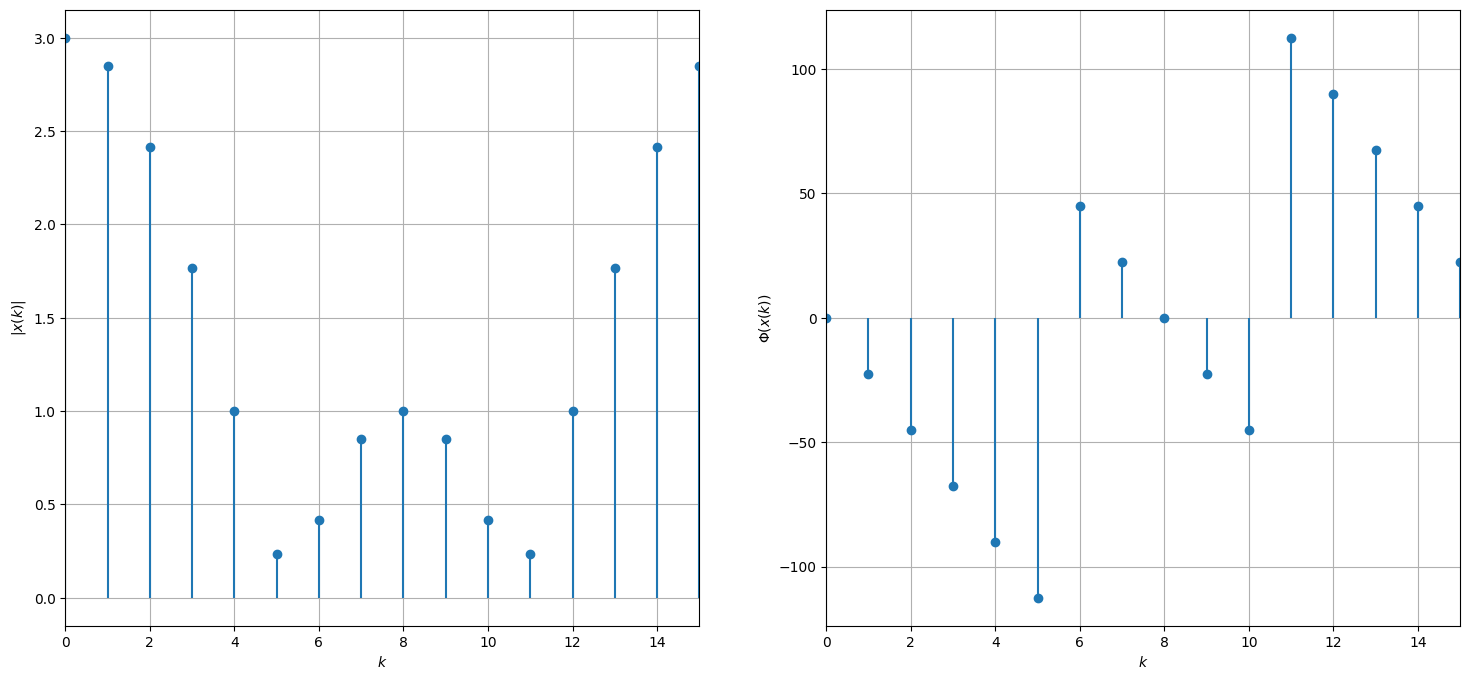

In [22]:
x, y =porta(0,2,1,0,15)

x_reordenado, y_reordenado = reordenar(y)

# print("y_reordenado = ",y_reordenado)

FFT =   functionFFT(y_reordenado)

figure,axis = plt.subplots(1,2, figsize=(18,8))
(markerline, stemlines, baseline) = axis[0].stem(x_reordenado, (abs(FFT)))
axis[0].set_xlim(min(x_reordenado),max(x_reordenado))
axis[0].set_xlabel("$k$")
axis[0].set_ylabel("$|x(k)|$")
axis[0].grid(True)
baseline.set_visible(False)

(markerline, stemlines, baseline) = axis[1].stem(x_reordenado, (np.angle(FFT)*180/np.pi))
axis[1].set_xlim(min(x_reordenado),max(x_reordenado))
axis[1].set_xlabel("$k$")
axis[1].set_ylabel("$\Phi(x(k))$")
axis[1].grid(True)
baseline.set_visible(False)


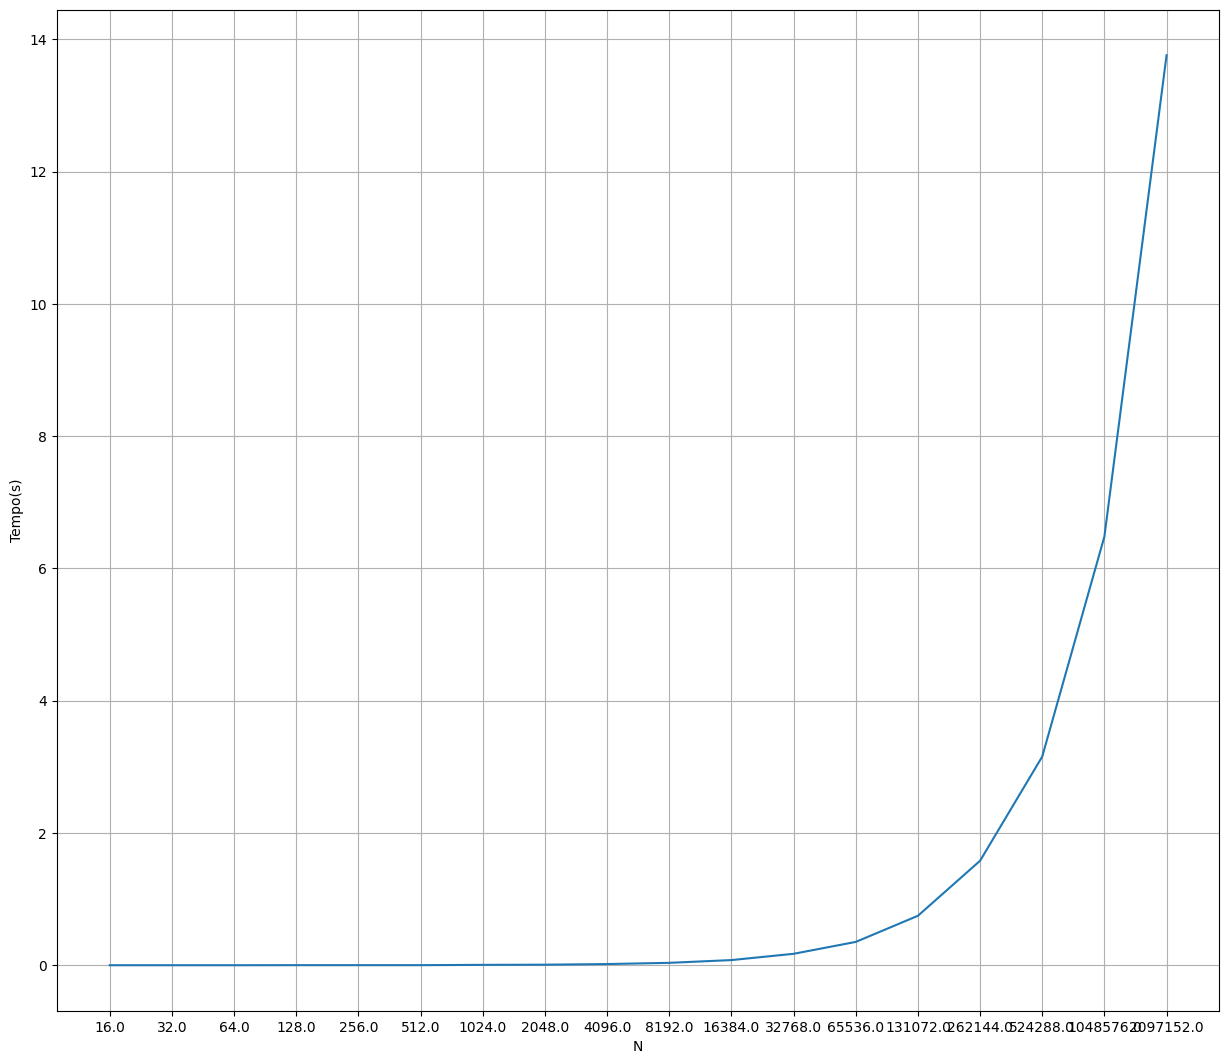

In [25]:
qtd_testes = 18
N = 16
indice = mt.ceil(np.log2(N))

vetor_N_fft = np.array([])
vetor_tempo_fft = np.array([])

for i in range (qtd_testes):

    #tempo imediatamente antes de executar a FFT
    inicio = time.time()

    x, y =porta(0,2,1,0,2**(i + indice))
    fft = functionFFT(y)
    #tempo imediatamente depois de executar a FFT
    final = time.time()

    vetor_tempo_fft = np.append(vetor_tempo_fft, final-inicio)
    vetor_N_fft=np.append(vetor_N_fft,2**(i + indice))

plt.figure(figsize=(15,13))
plt.plot(vetor_N_fft,vetor_tempo_fft)
plt.xscale('log', base=2)
plt.xticks(vetor_N_fft, [str(val) for val in vetor_N_fft])  
plt.xlabel("N")
plt.ylabel("Tempo(s)")
plt.grid(True)

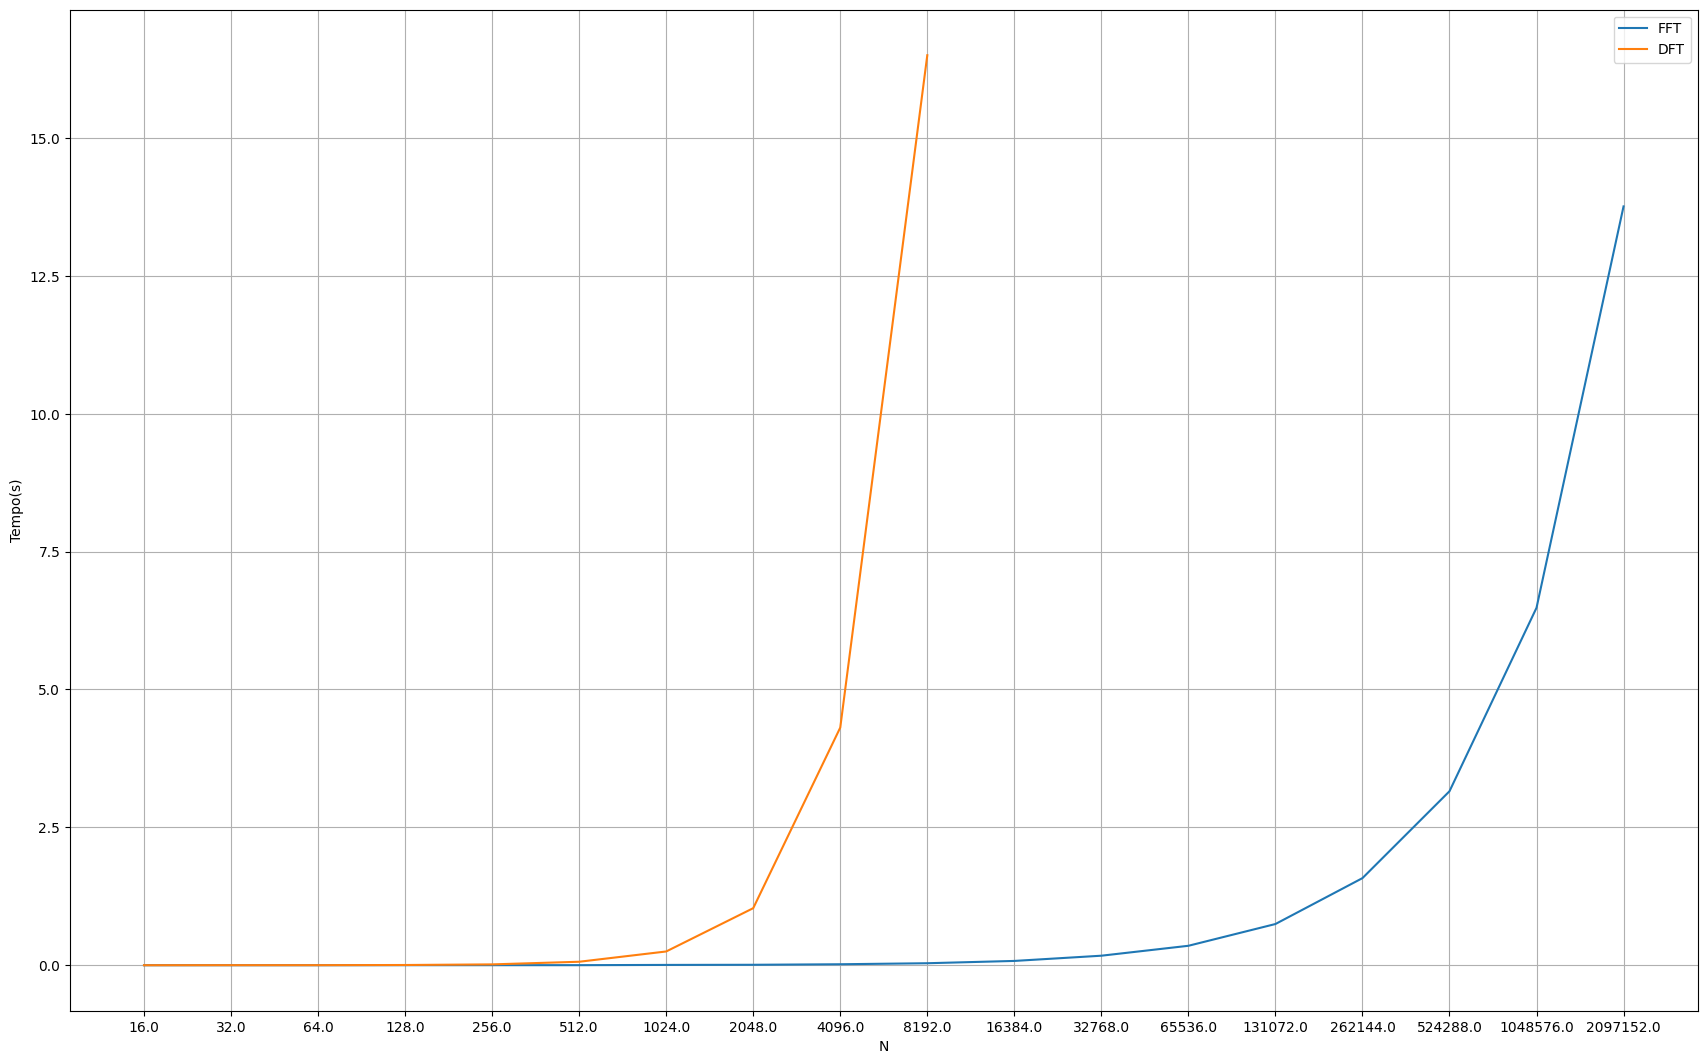

In [29]:
plt.figure(figsize=(21,13))
plt.plot(vetor_N_fft,vetor_tempo_fft, label="FFT")
plt.plot(vetor_N,vetor_tempo, label="DFT")
plt.xscale('log', base=2)
plt.xticks(vetor_N_fft, [str(val) for val in vetor_N_fft])  
plt.xlabel("N")
plt.ylabel("Tempo(s)")
plt.legend()
plt.grid(True)